In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
x_data = np.linspace(0.0,10.0,10000)
x_data

array([0.00000000e+00, 1.00010001e-03, 2.00020002e-03, ...,
       9.99799980e+00, 9.99899990e+00, 1.00000000e+01])

In [3]:
noise = np.random.rand(len(x_data))
noise

array([0.77784365, 0.81624896, 0.07857936, ..., 0.47448045, 0.35398235,
       0.23580629])

y = mx + b
b =  5


In [6]:
y_true = (0.5 * x_data) + 5 + noise
y_true

array([ 5.77784365,  5.81674901,  5.07957946, ..., 10.47348035,
       10.3534823 , 10.23580629])

# creating data frame 

In [7]:
x_df = pd.DataFrame(data = x_data,columns =['X Data'])
y_df = pd.DataFrame(data = y_true,columns = ['Y'])

In [8]:
x_df.head()

,X Data
0,0.000
1,0.001
2,0.002
3,0.003
4,0.004


In [9]:
y_df.head()

,Y
0,5.777844
1,5.816749
2,5.079579
3,5.996922
4,5.640476


In [11]:
my_data = pd.concat([x_df,y_df],axis = 1)

In [12]:
my_data.head()

,X Data,Y
0,0.000,5.777844
1,0.001,5.816749
2,0.002,5.079579
3,0.003,5.996922
4,0.004,5.640476


In [14]:
my_sample_data = my_data.sample(n=250)
my_sample_data.head()

,X Data,Y
7255,7.255726,9.391967
8979,8.979898,10.141963
129,0.129013,5.146351
2533,2.533253,7.232449
8365,8.365837,9.281570


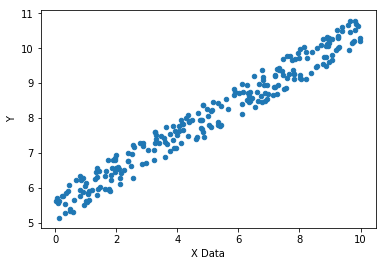

In [19]:
my_sample_data.plot(kind='scatter',x = 'X Data',y = 'Y')

In [20]:
batch_size = 8
np.random.rand(2)

array([0.07912929, 0.46553749])

In [21]:
m = tf.Variable(0.07)
b = tf.Variable(0.46)

Instructions for updating:
Colocations handled automatically by placer.


In [22]:
xph = tf.placeholder(tf.float32,[batch_size])
yph = tf.placeholder(tf.float32,[batch_size])

In [23]:
y_model = m * xph + b

In [24]:
error = tf.reduce_sum(tf.square(yph - y_model))

In [26]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)
train = optimizer.minimize(error)

In [27]:
init = tf.global_variables_initializer()

In [28]:
with tf.Session() as sess:
    sess.run(init)
    batches = 1000
    for i in range(batches):
        rand_int = np.random.randint(len(x_data),size = batch_size)
        feed = {xph:x_data[rand_int],yph:y_true[rand_int]}
        sess.run(train,feed_dict = feed)
    model_m,model_b = sess.run([m,b])

In [29]:
model_m

0.52203023

In [30]:
y_hat = model_m * x_data + model_b

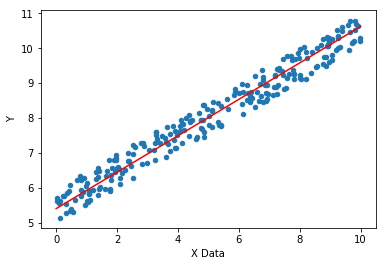

In [32]:
my_sample_data.plot(kind = 'scatter',x = 'X Data',y = 'Y')
plt.plot(x_data,y_hat,'r')